In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

import os

# This notebook is for generatings plots

Note that right now the scenarios need to be re-run, so don't try to read too far into the plots.

- 5.1: Exploratory analysis of failures vs. ambient conditions
- 5.2: Plot parameter estimates in MCMC chains
- 5.3: [TO DO] Comparison of data-generating, empirical, and estimated parameter distributions


In [148]:
scenarios = pd.read_csv(os.path.join('inputs','scenarios.csv'), index_col='name')


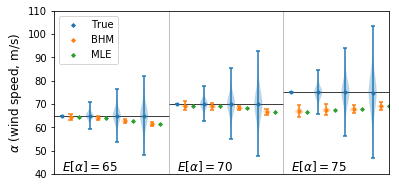

In [166]:
import generators

import seaborn as sns
colors = sns.color_palette()


from matplotlib import pyplot as plt

mle_est = [64.2, 63.8, 62.7, 61.2, 
           69.1, 68.9, 68.2, 66.6, 
           66.7, 67.3, 67.6, 69.1]

true = []
mcmc = []
for s in scenarios.index:
    if s > 12:
        continue
    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'parameters.csv'), index_col=0)
    approx = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'chains','Wind.csv'), index_col=0).iloc[5000:]
    approx = approx.loc[np.random.choice(approx.index, len(params))]
#     params = generators.params(scenarios.loc[s], fleet_size=len(approx))
    true.append(params['Wind.threshold'].tolist())
    mcmc.append(approx['threshold.Wind'].tolist())
    
fig, ax = plt.subplots(figsize=(6,3))

spaces = np.linspace(0,5,4)
gap = 7
dx = 0.5
tru_pos = spaces.tolist()+(gap+spaces).tolist()+(2*gap+spaces).tolist()
est_pos = np.array(tru_pos)+dx
mle_pos = np.array(est_pos)+dx

ax.violinplot(true, positions=tru_pos)
ax.violinplot(mcmc, positions=est_pos)
ax.scatter([0,0], [0,0], marker='D', color=colors[0], label='True', s=7)
ax.scatter([0,0], [0,0], marker='D', color=colors[1], label='BHM', s=7)

ax.plot(tru_pos, 
        [np.average(x) for x in true], 
        marker='.', color=colors[0], ls=' ')
ax.plot(est_pos, 
        [np.average(x) for x in mcmc], 
        marker='.', color=colors[1], ls=' ')

ax.scatter(mle_pos, mle_est, marker='D', color=colors[2], label='MLE', s=7)

ax.hlines(65,-0.5,gap-.5, zorder=0, color='k', lw=0.75)
ax.hlines(70,gap-0.5,2*gap-.5, zorder=0, color='k', lw=0.75)
ax.hlines(75,2*gap-0.5, 3*gap-.5, zorder=0, color='k', lw=0.75)
ax.set_ylabel(r'$\alpha$ (wind speed, m/s)', fontsize=12)
ax.set_xticks([])

ax.set_ylim(40,110)
ylim = ax.get_ylim()
ax.text(0,ylim[0], r'$E\left[\alpha\right]=65$', ha='left',va='bottom', fontsize=12)
ax.text(gap,ylim[0], r'$E\left[\alpha\right]=70$', ha='left',va='bottom', fontsize=12)
ax.text(2*gap,ylim[0], r'$E\left[\alpha\right]=75$', ha='left',va='bottom', fontsize=12)

ax.vlines(gap-0.5, 0,110,lw=0.5, color='0.5')
ax.vlines(2*gap-0.5, 0,110,lw=0.5, color='0.5')
ax.set_xlim(-0.5, max(est_pos)+0.5)
plt.legend(loc=2)
plt.savefig('violins.png', dpi=200)

# xvals = np.arange(0,150,150)
# xx, pp = np.meshgrid(xvals, params.index)
# for i, p in params.iterrows():
#     g_x[xvals].loc[i] = 1./(1+np.exp(-1*p['Wind.slope']*(xvals - p['Wind.threshold'])))

In [280]:
from matplotlib import colors

xvals = np.arange(0,150,1)
for s in scenarios.index:
    if s > 12:
        continue

    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'parameters.csv'), index_col=0)
    approx = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'chains','Wind.csv'), index_col=0).iloc[5000:]
    
    gvals = pd.DataFrame(columns=xvals)
    gaprx = pd.DataFrame(columns=xvals)
    for i, p in params.iterrows():
        gvals.loc[i] = 1./(1+np.exp(-1*p['Wind.slope']*(xvals-p['Wind.threshold'])))
        
    for i, p in approx.iterrows():
        gaprx.loc[i] = 1./(1+np.exp(-1*p['Wind.slope']*(xvals-p['Wind.threshold'])))
        
    

KeyboardInterrupt: 

2 0
2 0
2 0


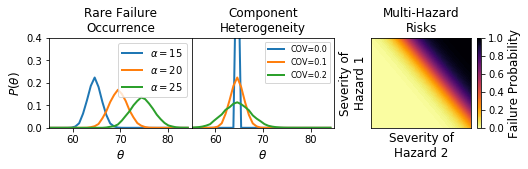

In [236]:
from matplotlib import colors

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,2.5))
fig.subplots_adjust(bottom=0.25, top=0.75, wspace=0.3)

i = 0
thresholds = [15,20,25]
for j, s in enumerate([2,6,10]):
    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s), 'parameters.csv'), index_col=0)
    H = np.histogram(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50))
    print len(H), i
    ax[i].plot(H[1][:-1], H[0].astype(float)/H[0].sum(), lw=2, label=r'$\alpha=%i$'%(thresholds[j]))
ax[i].set_ylim(0,0.4)
ax[i].set_xticks([50,60,70,80])
ax[i].set_xticklabels([50,60,70,80], fontsize=10)
ax[i].set_xlim(55,85)
ax[i].set_ylabel(r'$P(\theta)$', fontsize=12)
ax[i].set_xlabel(r'$\theta$', fontsize=12)
ax[i].legend(fontsize=10)
    

i = 1
covs = [0, 0.1, 0.2, 0.3]
for s in [1,2,3,4][:-1]:
    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s), 'parameters.csv'), index_col=0)
    H = np.histogram(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50))
    ax[i].plot(H[1][:-1], H[0].astype(float)/H[0].sum(), lw=2, label=r'COV=%.1f'%(covs[s-1]))
ax[i].set_ylim(0,0.4)
ax[i].set_xticks([50,60,70,80])
ax[i].set_xticklabels([50,60,70,80], fontsize=10)
ax[i].set_xlim(55,85)
ax[i].set_yticks([])
# ax[i].set_ylabel(r'$P(\theta)$', fontsize=14)
ax[i].set_xlabel(r'$\theta$', fontsize=12)

l, b, w, h = ax[i].get_position().bounds
far_r = l + w
l, b, w, h = ax[i-1].get_position().bounds
w = 0.5*(far_r-l) 
ax[i-1].set_position([l, b, w, h])
ax[i].set_position([l+w, b, w, h])
ax[i].legend(fontsize=8)


i = 2
s = 19
scenarios = pd.read_csv(os.path.join('inputs/scenarios.csv'), index_col='name')
y = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'failures.csv'), index_col=0)['count']
X = pd.read_csv(os.path.join('inputs','weather.csv'), index_col='time')



# tWind = float(scenarios['Wind.threshold_hyperparams'].loc[s])-50
# tRain = float(scenarios['DayPrecip.threshold_hyperparams'].loc[s])
tWind = 65
tRain = 0

b1 = 0.2
b2 = 5

xx, yy = np.meshgrid(np.linspace(X['Wind'].min(), 1.5*X['Wind'].max(), 100),
         np.linspace(X['DayPrecip'].min(), 1.5*X['DayPrecip'].max(), 100))

zz = 1./(1+np.exp(-1*b1*(xx-tWind)-b2*(yy-tRain)))

p = ax[i].contourf(xx, yy, zz, 100, cmap='inferno_r')
ax[i].set_ylabel('Severity of\nHazard 1', fontsize=12)
ax[i].set_xlabel('Severity of\nHazard 2', fontsize=12)
ax[i].set_yticks([])
ax[i].set_xticks([])
cbar = plt.colorbar(p)
cbar.set_ticks(np.round(np.linspace(0,1,6),1))
cbar.set_label('Failure Probability', fontsize=12)
# ax[i].hist2d(np.linspace(X['Wind'].min(), X['Wind'].max(), 100), )

# idx = y > 0
# ax[i].scatter(X['Wind'], X['DayPrecip'], c=np.log(y), cmap='Blues', vmin=1, vmax=np.log(y).max(), edgecolors='lightblue', s=y)



# idx = (X['Wind'] < tWind) & (X['DayPrecip'] < tRain)

# use_obs = np.random.choice(X[idx].index, 1000)
# ax[i].plot(X['Wind'].loc[use_obs], y.loc[use_obs], marker='.', color='0.5', ls=' ', label='Random', alpha=0.5)

# idx = (X['Wind'] >= tWind) & (X['DayPrecip'] < tRain)
# ax[i].plot(X['Wind'][idx], y[idx], marker='.', color='b', ls=' ', label='Hazard1', alpha=0.5)

# idx = (X['Wind'] < tWind) & (X['DayPrecip'] >= tRain)
# ax[i].plot(X['Wind'][idx], y[idx], marker='.', color='g', ls=' ', label='Hazard2', alpha=0.5)

# idx = (X['Wind'] >= tWind) & (X['DayPrecip'] >= tRain)
# ax[i].plot(X['Wind'][idx], y[idx], marker='.', color='Red', ls=' ', label='Multi-Hazard')

# ax[i].legend(fontsize=8)

ax[0].set_title('Rare Failure\nOccurrence', fontsize=12)
ax[1].set_title('Component\nHeterogeneity', fontsize=12)
ax[2].set_title('Multi-Hazard\nRisks', fontsize=12)
plt.savefig('experimental_design.png')
plt.show()



2 0
2 0
2 0


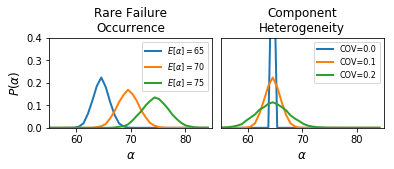

In [160]:
from matplotlib import colors

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,2.5))
fig.subplots_adjust(bottom=0.25, top=0.75, wspace=0.3)

i = 0
thresholds = [65,70,75]
for j, s in enumerate([2,6,10]):
    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s), 'parameters.csv'), index_col=0)
    H = np.histogram(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50))
    print len(H), i
    ax[i].plot(H[1][:-1], H[0].astype(float)/H[0].sum(), lw=2, label=r'$E\left[\alpha\right]=%i$'%(thresholds[j]))
ax[i].set_ylim(0,0.4)
ax[i].set_xticks([50,60,70,80])
ax[i].set_xticklabels([50,60,70,80], fontsize=10)
ax[i].set_xlim(55,85)
ax[i].set_ylabel(r'$P(\alpha)$', fontsize=12)
ax[i].set_xlabel(r'$\alpha$', fontsize=12)
ax[i].legend(fontsize=8)
    

i = 1
covs = [0, 0.1, 0.2, 0.3]
for s in [1,2,3,4][:-1]:
    params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s), 'parameters.csv'), index_col=0)
    H = np.histogram(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50))
    ax[i].plot(H[1][:-1], H[0].astype(float)/H[0].sum(), lw=2, label=r'COV=%.1f'%(covs[s-1]))
ax[i].set_ylim(0,0.4)
ax[i].set_xticks([50,60,70,80])
ax[i].set_xticklabels([50,60,70,80], fontsize=10)
ax[i].set_xlim(55,85)
ax[i].set_yticks([])
# ax[i].set_ylabel(r'$P(\theta)$', fontsize=14)
ax[i].set_xlabel(r'$\alpha$', fontsize=12)

l, b, w, h = ax[i].get_position().bounds
far_r = l + w
l, b, w, h = ax[i-1].get_position().bounds
w = 0.5*(far_r-l) 
ax[i-1].set_position([l, b, w, h])
ax[i].set_position([l+w, b, w, h])
ax[i].legend(fontsize=8)


# i = 2
# s = 19
# scenarios = pd.read_csv(os.path.join('inputs/scenarios.csv'), index_col='name')
# y = pd.read_csv(os.path.join('scenarios','scenario%i'%(s),'failures.csv'), index_col=0)['count']
# X = pd.read_csv(os.path.join('inputs','weather.csv'), index_col='time')



# # tWind = float(scenarios['Wind.threshold_hyperparams'].loc[s])-50
# # tRain = float(scenarios['DayPrecip.threshold_hyperparams'].loc[s])
# tWind = 65
# tRain = 0

# b1 = 0.2
# b2 = 5

# xx, yy = np.meshgrid(np.linspace(X['Wind'].min(), 1.5*X['Wind'].max(), 100),
#          np.linspace(X['DayPrecip'].min(), 1.5*X['DayPrecip'].max(), 100))

# zz = 1./(1+np.exp(-1*b1*(xx-tWind)-b2*(yy-tRain)))

# p = ax[i].contourf(xx, yy, zz, 100, cmap='inferno_r')
# ax[i].set_ylabel('Severity of\nHazard 1', fontsize=12)
# ax[i].set_xlabel('Severity of\nHazard 2', fontsize=12)
# ax[i].set_yticks([])
# ax[i].set_xticks([])
# cbar = plt.colorbar(p)
# cbar.set_ticks(np.round(np.linspace(0,1,6),1))
# cbar.set_label('Failure Probability', fontsize=12)

ax[0].set_title('Rare Failure\nOccurrence', fontsize=12)
ax[1].set_title('Component\nHeterogeneity', fontsize=12)
# ax[2].set_title('Multi-Hazard\nRisks', fontsize=12)
fig.subplots_adjust(wspace=0.05)
plt.savefig('experimental_design.png')
plt.show()



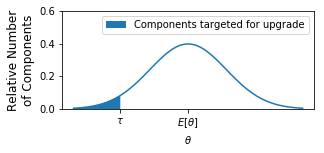

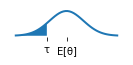

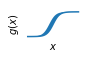

In [66]:
xvals = np.linspace(-3,3)
pdf = stats.norm.pdf(xvals)
fig, ax = plt.subplots(figsize=(5,2))
ax.plot(xvals,pdf)#, label=r'Histogram of parameters $\theta$')
ax.fill_between(xvals[:11], pdf[:11], label=r'Components targeted for upgrade')
ax.set_xticks([xvals[10], 0])
ax.set_ylabel('Relative Number\nof Components', fontsize=12)
ax.set_xticklabels([r'$\tau$', r'$E[\theta]$'], fontsize=10)
ax.set_xlabel(r'$\theta$', fontsize=10)
ax.set_ylim(0,0.6)
# ax.set_yticks([])
plt.legend(fontsize=10)
fig.subplots_adjust(bottom=0.2, left=0.2)
plt.savefig('upgrades.png', dpi=500)
plt.show()


xvals = np.linspace(-3,3)
pdf = stats.norm.pdf(xvals)
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_frame_on(False)
ax.plot(xvals,pdf,lw=2)#, label=r'Histogram of parameters $\theta$')
ax.fill_between(xvals[:16], pdf[:16], label=r'Components targeted for upgrade')
ax.set_xticks([xvals[15], 0])
ax.set_yticks([])
ax.set_xticklabels([r'$\mathrm{\tau}$', r'$\mathrm{E[\theta]}$'], fontsize=10, fontdict={'family': 'serif', 'weight': 'normal',})
plt.show()

xvals = np.linspace(30,110)
g_t = 1./(1.+np.exp(-0.2*(xvals-70)))
g_e = 1./(1.+np.exp(-0.197*(xvals-64)))

fig, ax = plt.subplots(figsize=(1,0.5))
ax.plot(xvals, g_t)
# ax.plot(xvals, g_e)
ax.fill_between(xvals, g_t, g_e)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(r'$g(x)$', fontsize=10)
ax.set_xlabel(r'$x$', fontsize=10)
ax.set_frame_on(False)
plt.show()

In [98]:
results = pd.read_csv('results2.csv', index_col=0)
results.head()



,scenario,method,mean,var,KLD,kld_g,delta=0.1,delta=0.2,delta=0.01
0,scenario1,true,65.00,0.000,0.000000,0.000000,2.75,1.05,0.13
1,scenario1,bhm,64.28,0.369,0.000004,-0.004612,3.29,1.26,0.16
2,scenario1,mle,64.24,0.369,0.000004,-0.004850,3.31,1.26,0.16
3,scenario2,true,64.97,1.481,0.000000,0.000000,3.03,1.15,0.15
4,scenario2,bhm,63.88,0.342,0.000004,-0.006925,3.56,1.36,0.17


In [125]:
scenarios = results['scenario'].unique()
res = results.set_index(['scenario','method'])
for s in scenarios:
    print ((res.xs(s)-res.xs(s).loc['true'])/res.xs(s).loc['true'])['mean']

method
true    0.000000
bhm    -0.011077
mle    -0.011692
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.016777
mle    -0.017239
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.033723
mle    -0.034339
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.056993
mle    -0.057455
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.012286
mle    -0.013286
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.014866
mle    -0.015580
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.024739
mle    -0.024167
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.046788
mle    -0.047503
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.109333
mle    -0.110533
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.101668
mle    -0.102602
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.096783
mle    -0.097584
Name: mean, dtype: float64
method
true    0.000000
bhm    -0.076276
mle    -0.077077
Name: m

(0.5700000000000002, 13.33)


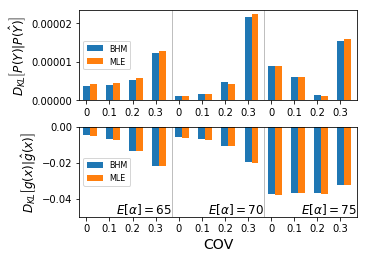

In [163]:
fig, ax = plt.subplots(nrows=2, figsize=(5,3.5))

idx = results['method']=='true'
positions = np.arange(1,sum(idx)+1)
w = 0.3

# idx = results['method']=='true'
# ax[0].bar(positions+0, results['KLD'][idx].tolist(), width=w, label='True')
# ax[1].bar(positions+0, results['kld_g'][idx].tolist(), width=w, label='True')
idx = results['method']=='bhm'
ax[0].bar(positions+w, results['KLD'][idx].tolist(), width=w, label='BHM')
ax[1].bar(positions+w, results['kld_g'][idx].tolist(), width=w, label='BHM')
idx = results['method']=='mle'
ax[0].bar(positions+2*w, results['KLD'][idx], width=w, label='MLE')
ax[1].bar(positions+2*w, results['kld_g'][idx].tolist(), width=w, label='MLE')

ax[0].set_ylabel(r'$D_{KL}\left[P(Y)|P(\hat{Y})\right]$', fontsize=12)
ax[1].set_ylabel(r'$D_{KL}\left[g(x)|\hat{g}(x)\right]$', fontsize=12)
ax[1].set_ylim(-0.05,0)

ylim = ax[1].get_ylim()

# ax[1].set_xticks([])
ax[1].text(5,ylim[0], r'$E\left[\alpha\right]=65$', ha='right',va='bottom', fontsize=12)
ax[1].text(9,ylim[0], r'$E\left[\alpha\right]=70$', ha='right',va='bottom', fontsize=12)
ax[1].text(13,ylim[0], r'$E\left[\alpha\right]=75$', ha='right',va='bottom', fontsize=12)

print ax[1].get_xlim()


ax[1].vlines(5, *ylim,lw=0.5, color='0.5')
ax[1].vlines(9, *ylim, lw=0.5, color='0.5')
ax[1].set_ylim(*ylim)
ax[1].set_xlim(0,13)


ylim = ax[0].get_ylim()
ax[0].vlines(5, *ylim, lw=0.5, color='0.5')
ax[0].vlines(9, *ylim, lw=0.5, color='0.5')
ax[0].set_ylim(*ylim)
ax[0].set_xlim(0,13)

# ax[1].set_ylim(0,110)
# ax[1].set_xlim(-0.5, max(est_pos)+0.5)
ax[0].set_xticks(np.arange(1,13)+0.3)
ax[0].set_xticklabels(['0','0.1','0.2','0.3','0','0.1','0.2','0.3','0','0.1','0.2','0.3'])

ax[1].set_xticks(np.arange(1,13)+0.3)
ax[1].set_xticklabels(['0','0.1','0.2','0.3','0','0.1','0.2','0.3','0','0.1','0.2','0.3'])
ax[1].set_xlabel(r'COV', fontsize=14)

ax[0].legend(fontsize=8, loc=6)
ax[1].legend(fontsize=8, loc=6)
ax[0].set_xlim(1,13)
ax[1].set_xlim(1,13)

fig.subplots_adjust(left=0.2, hspace=0.3, bottom=0.15, right=0.97, top=0.97)
plt.savefig('kl_divergence.png', dpi=200)
plt.show()


dcol = 'delta=0.01'



In [194]:
results = pd.read_csv('upgrades.csv')
results.head()

,method,mean(a),var(a),mean(b),1-epsilon (needs to be around 0.95),tau,m,components
0,TRUE,65.0,0.00,0.200,0.956719,NaN,9000.00,90.0000
1,BHM,64.3,0.37,0.201,0.952830,64.9,8380.30,83.8030
2,MLE,64.2,NaN,0.201,0.951826,NaN,9000.00,90.0000
3,TRUE,65.0,1.50,0.200,0.951207,65.7,7161.86,71.6186
4,BHM,63.9,0.34,0.201,0.957884,64.6,8850.25,88.5025


[0.009000000000000001, 0.00716186, 0.00698334, 0.006813240000000001, 0.0058, 0.00388649, 0.0036316899999999995, 0.0034154600000000004, 0.0, 0.0, 0.0, 0.0]
[0.0083803, 0.008850249999999999, 0.00895666, 0.00945201, 0.005, 0.005551469999999999, 0.006726399999999999, 0.00774509, 0.0, 0.0, 0.000452795, 0.00553153]
[0.009000000000000001, 0.009000000000000001, 0.0, 0.009300000000000001, 0.0064, 0.006500000000000001, 0.0076, 0.0087, 0.0, 0.0, 0.0011, 0.006999999999999999]
(0.5999999999999999, 12.700000000000001)


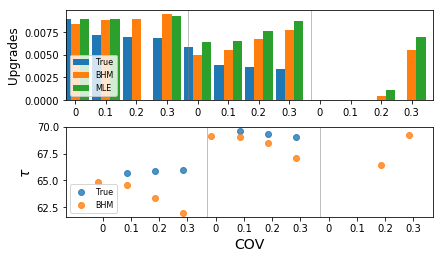

In [215]:

results['components'] /= 100.

fig, ax = plt.subplots(nrows=2, figsize=(6,3.5))

idx = results['method']=='TRUE'
positions = np.arange(1,sum(idx)+1)
w = 0.3

idx = results['method']=='TRUE'
ax[1].plot(positions+w/2., (results['tau'][idx]).tolist(), marker='o', ls=' ', label='True', alpha=0.8)
ax[0].bar(positions, results['components'][idx].tolist(), width=w, label='True')
print results['components'][idx].tolist()

idx = results['method']=='BHM'
ax[1].plot(positions+w/2., (results['tau'][idx]).tolist(), marker='o', ls=' ', label='BHM', alpha=0.8)
ax[0].bar(positions+w, results['components'][idx].tolist(), width=w, label='BHM')
print results['components'][idx].tolist()

idx = results['method']=='MLE'
# ax[0].bar(positions+2*w, results['tau'][idx], width=w, label='MLE')
ax[0].bar(positions+2*w, results['components'][idx].tolist(), width=w, label='MLE')
print results['components'][idx].tolist()

ax[1].set_ylabel(r'$\tau$', fontsize=14)
ax[0].set_ylabel(r'Upgrades', fontsize=12)
# ax[1].set_ylim(-0.05,0)

ylim = ax[1].get_ylim()

# ax[1].set_xticks([])
# ax[1].text(5,ylim[0], r'$E\left[\alpha\right]=65$', ha='right',va='bottom', fontsize=12)
# ax[1].text(9,ylim[0], r'$E\left[\alpha\right]=70$', ha='right',va='bottom', fontsize=12)
# ax[1].text(13,ylim[0], r'$E\left[\alpha\right]=75$', ha='right',va='bottom', fontsize=12)

print ax[1].get_xlim()


ax[1].vlines(5, *ylim,lw=0.5, color='0.5')
ax[1].vlines(9, *ylim, lw=0.5, color='0.5')
ax[1].set_ylim(*ylim)
ax[1].set_xlim(0,13)


ylim = ax[0].get_ylim()
ax[0].vlines(5, *ylim, lw=0.5, color='0.5')
ax[0].vlines(9, *ylim, lw=0.5, color='0.5')
ax[0].set_ylim(*ylim)
ax[0].set_xlim(0,13)

# ax[1].set_ylim(0,110)
# ax[1].set_xlim(-0.5, max(est_pos)+0.5)
ax[0].set_xticks(np.arange(1,13)+0.3)
ax[0].set_xticklabels(['0','0.1','0.2','0.3','0','0.1','0.2','0.3','0','0.1','0.2','0.3'])

ax[1].set_xticks(np.arange(1,13)+0.3)
ax[1].set_xticklabels(['0','0.1','0.2','0.3','0','0.1','0.2','0.3','0','0.1','0.2','0.3'])
ax[1].set_xlabel(r'COV', fontsize=14)

ax[0].legend(fontsize=8, loc=3)
ax[1].legend(fontsize=8, loc=3)
ax[0].set_xlim(1,13)
# ax[1].set_xlim(1,13)

fig.subplots_adjust(left=0.12, hspace=0.3, bottom=0.15, right=0.97, top=0.97)
plt.savefig('upgrade_results.png', dpi=200)
plt.show()


dcol = 'delta=0.01'



In [235]:
results = pd.read_csv('upgrades.csv')
results.head()
results['components'] /= 100.

fig, ax = plt.subplots(figsize=(6,2))

idx = results['method']=='TRUE'
positions = np.arange(1,sum(idx)+1)
w = 0.25

idx = results['method']=='TRUE'
ax.bar(positions, results['components'][idx].tolist(), width=w, label='True')

idx = results['method']=='BHM'
ax.bar(positions+w, results['components'][idx].tolist(), width=w, label='BHM')

idx = results['method']=='MLE'
# ax[0].bar(positions+2*w, results['tau'][idx], width=w, label='MLE')
ax.bar(positions+2*w, results['components'][idx].tolist(), width=w, label='MLE')

ax.set_ylabel(r'Upgrades', fontsize=12)
# ax[1].set_ylim(-0.05,0)

ylim = ax.get_ylim()


ax.text(4.75,ylim[1], r'$E\left[\alpha\right]=65$', ha='right',va='bottom', fontsize=12, alpha=0.8)
ax.text(8.75,ylim[1], r'$E\left[\alpha\right]=70$', ha='right',va='bottom', fontsize=12)
ax.text(13,ylim[1], r'$E\left[\alpha\right]=75$', ha='right',va='bottom', fontsize=12)

ylim = ax.get_ylim()
ax.vlines(4.75, *ylim, lw=0.5, color='0.5')
ax.vlines(8.75, *ylim, lw=0.5, color='0.5')
ax.set_ylim(*ylim)

ax.set_xticks(np.arange(1,13)+0.3)
ax.set_xticklabels(['0','0.1','0.2','0.3','0','0.1','0.2','0.3','0','0.1','0.2','0.3'])
ax.set_xlabel(r'COV', fontsize=14)

ax.legend(fontsize=8, loc=3, framealpha=0.9)
ax.set_xlim(0.5,13)
ax.set_ylim(0,1)
# ax[1].set_xlim(1,13)

fig.subplots_adjust(left=0.12, hspace=0.3, bottom=0.25, right=0.97, top=0.9)
plt.savefig('upgrade_results.png', dpi=200)
plt.show()



KeyError: 'components'

In [111]:
ax[0].get_xlim()

(0.2875, 13.2125)

In [ ]:
s = 3
params = pd.read_csv(os.path.join('scenarios','scenario%i'%(s), 'parameters.csv'), index_col=0)
H = np.histogram()

fig, ax = plt.subplots()
ax.hist(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50), histtype='step', lw=2)

idx = params['Wind.threshold'] < t
ax.hist(params['Wind.threshold'].tolist(), bins=np.linspace(45,85,50), histtype='step', lw=2)




In [ ]:
for y in 

# 5.1 Failures vs ambient conditions

IndexError: index 4 is out of bounds for axis 0 with size 4

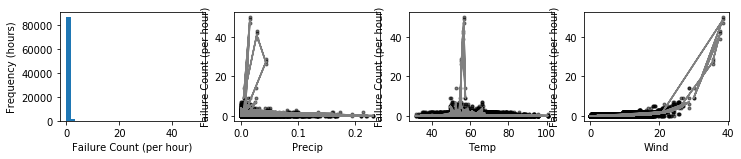

In [3]:
def make_plot(i):
    failures = pd.read_csv(os.path.join('scenarios','scenario%i'%(i),'failures.csv'), index_col='time')
    X = pd.read_csv(os.path.join('inputs/weather.csv'), index_col='time')
    
    fig, ax = plt.subplots(figsize=(12,2), ncols=4)
    ax[0].hist(failures['count'].tolist(), bins=30)
    ax[0].set_xlabel('Failure Count (per hour)')
    ax[0].set_ylabel('Frequency (hours)')
    
    for j, key in enumerate(X.keys()):
        ax[j+1].plot(X[key].tolist(), failures['count'].tolist(), ls=' ', marker='.', color='k', alpha=0.5)
        ax[j+1].set_xlabel(key.title())
        ax[j+1].set_ylabel('Failure Count (per hour)')
        
        ax[j+1].plot(X[key].tolist(), failures['rate'].tolist(), color='0.5')
    
    fig.subplots_adjust(hspace=0.2)
    fig.savefig(os.path.join('scenarios','scenario%i'%(i), 'plots','failure-EDA.png'), dpi=100)

for i in scenarios.index:
    make_plot(i)
    
    

# 5.2 Parameter estimates in MCMC chains

1


Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


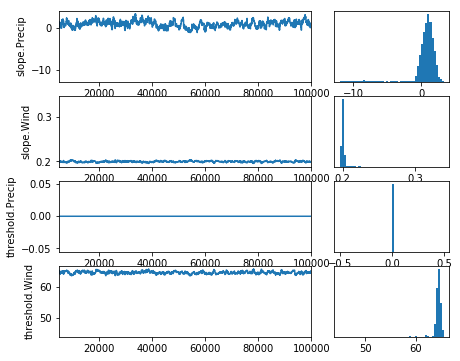



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


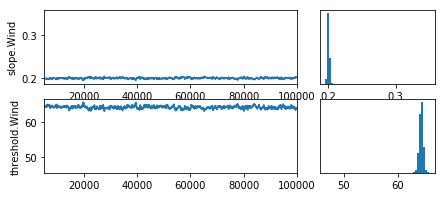



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


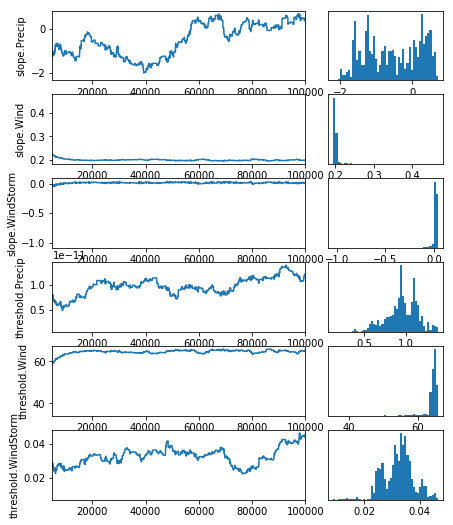

2


Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


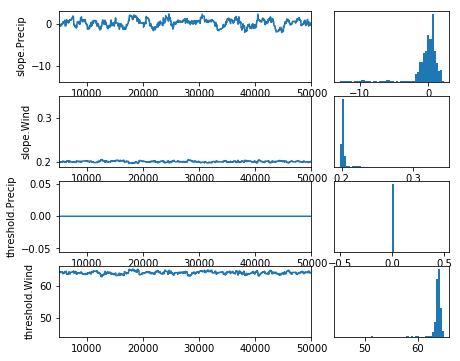



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


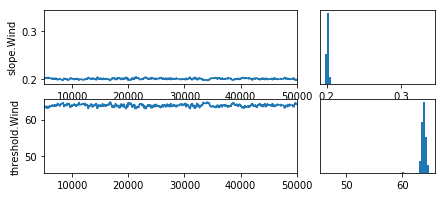



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


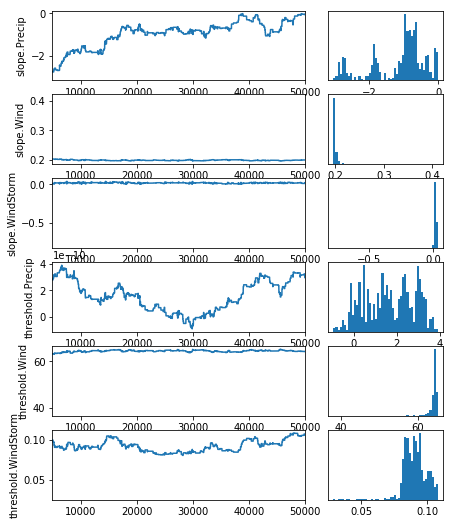

3


Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


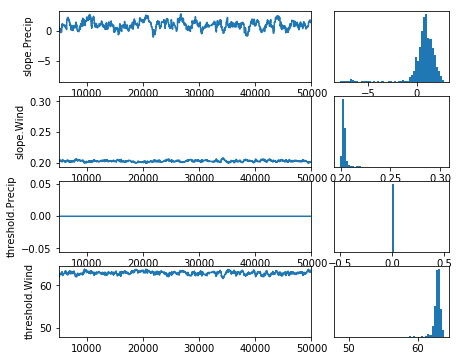



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


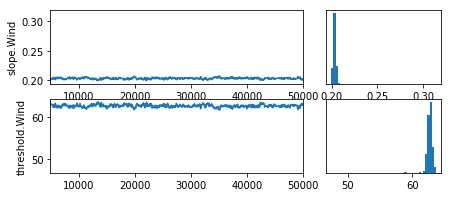



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


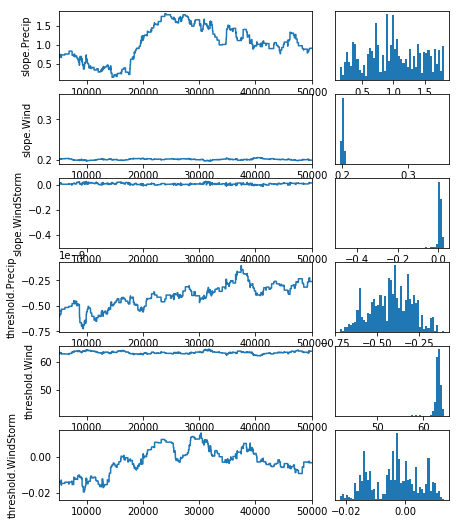

4


Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


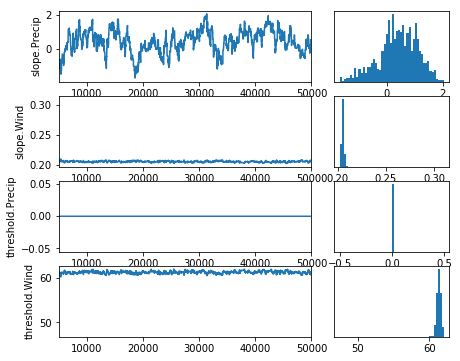



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


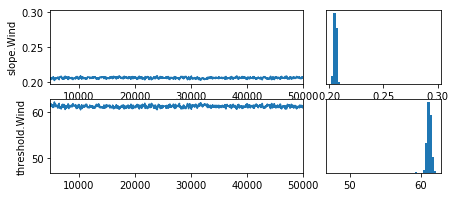



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


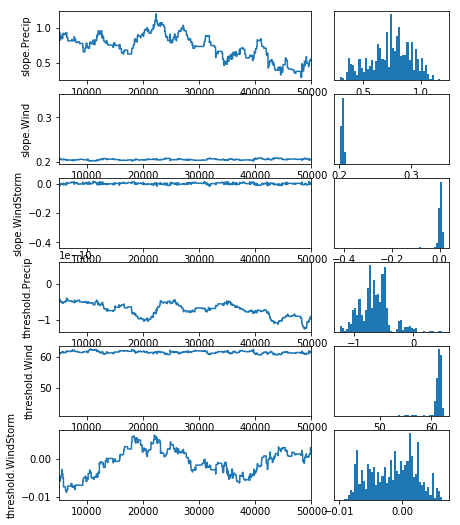

5


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


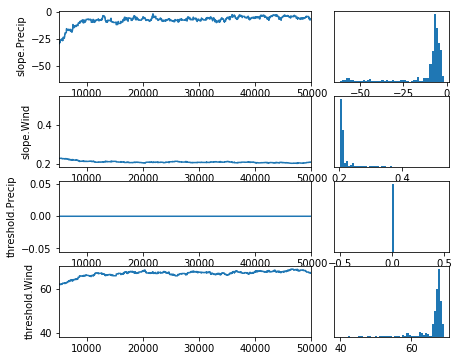



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


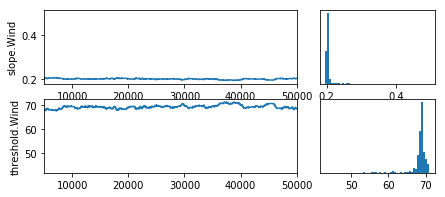



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


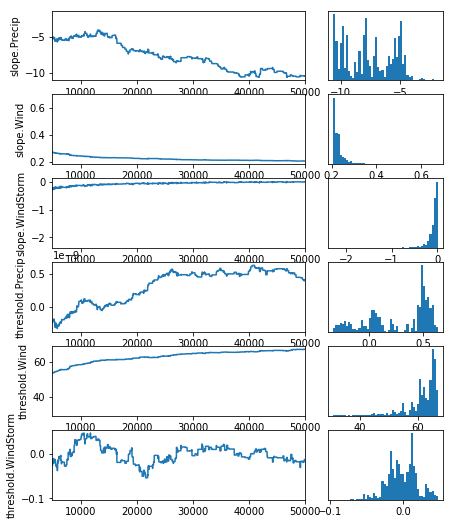

6


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


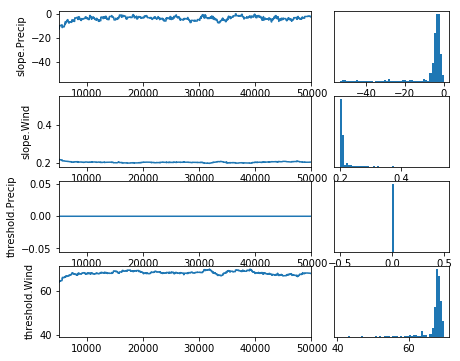



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


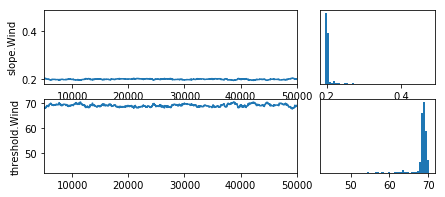



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


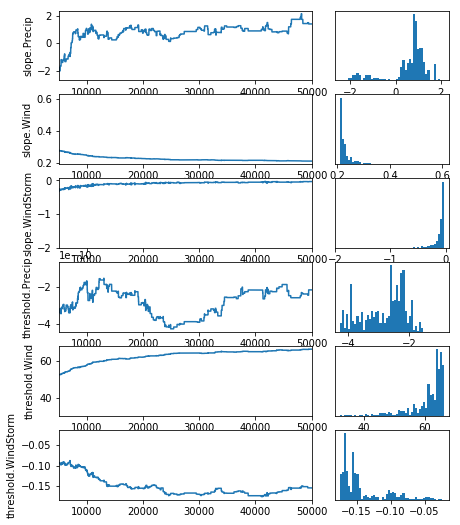

7


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


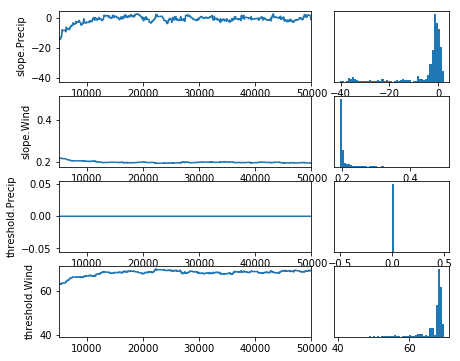



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


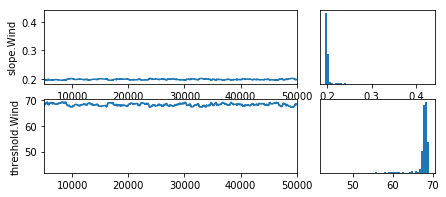



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


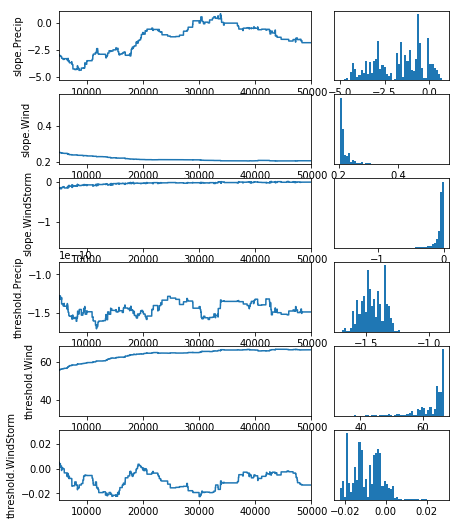

8


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


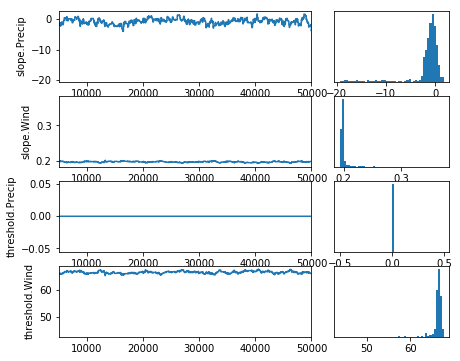



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


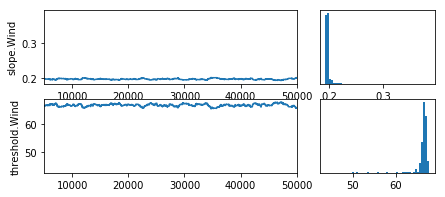



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


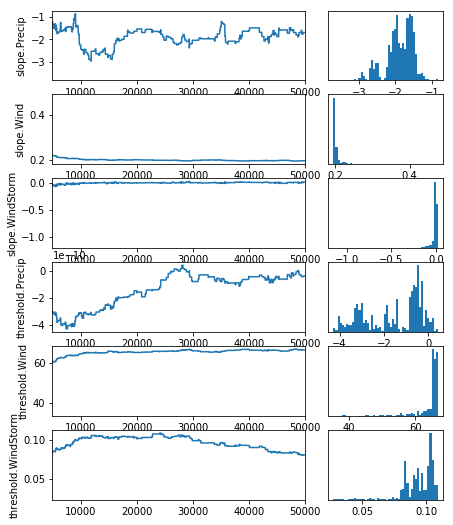

9


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


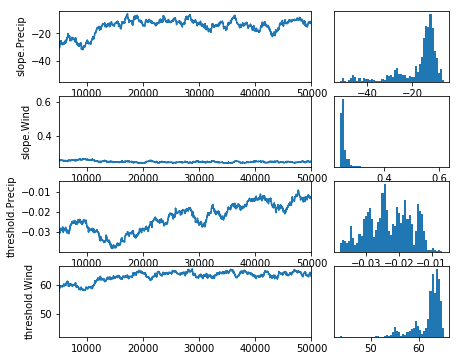



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


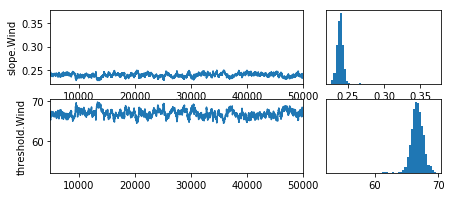



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


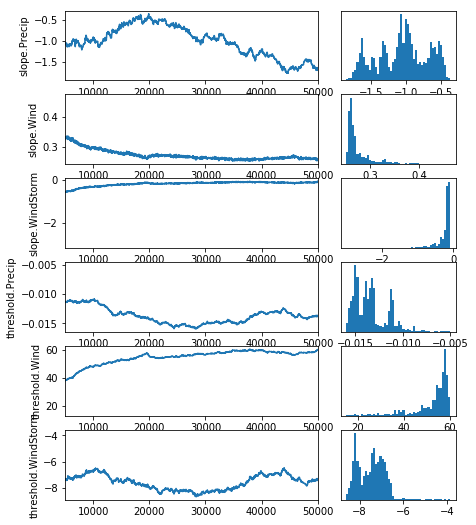

10


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


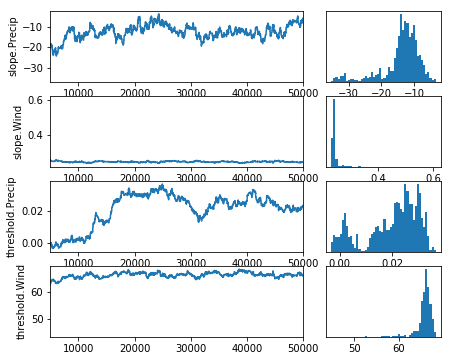



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


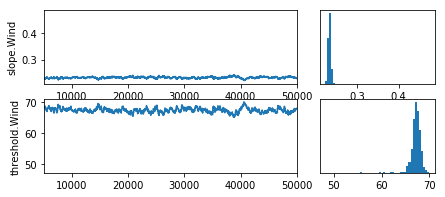



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


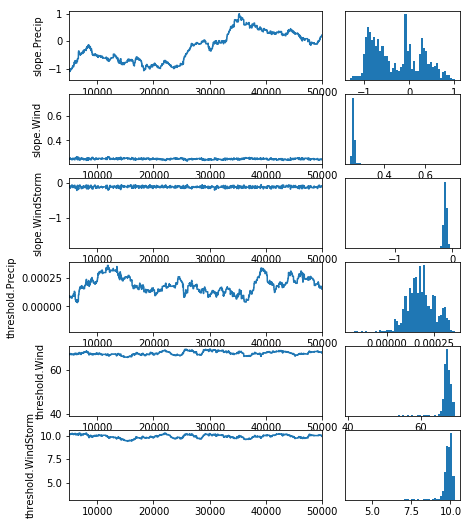

11


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


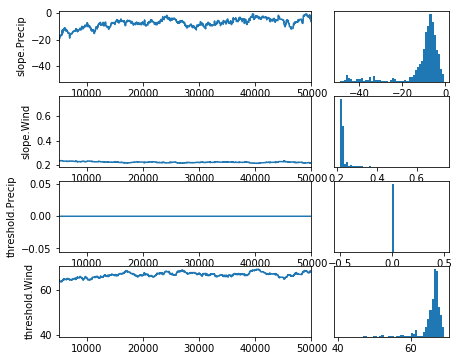



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


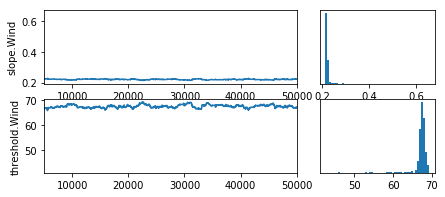



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


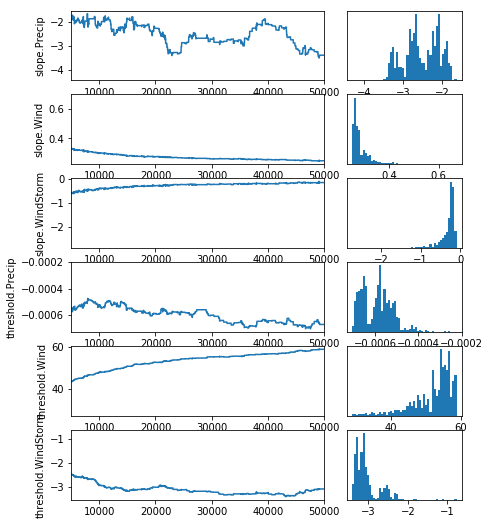

12


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


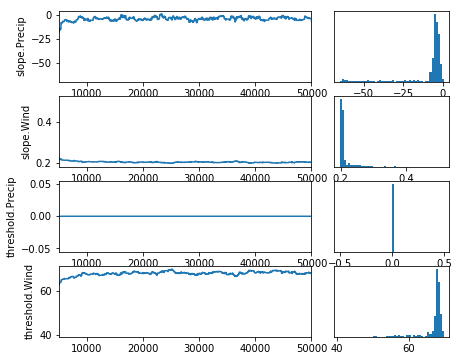



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


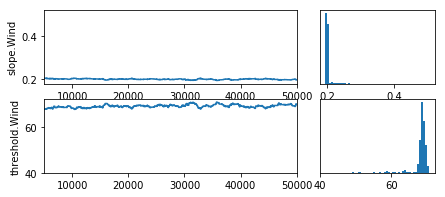



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


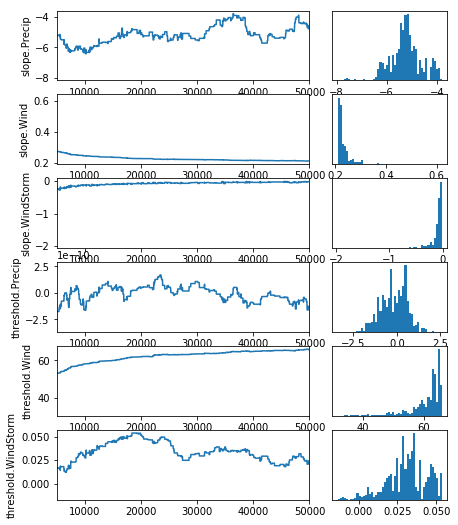

13


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


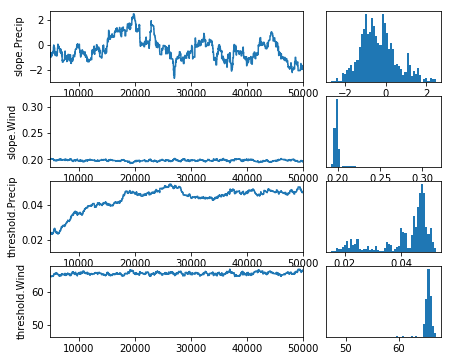



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


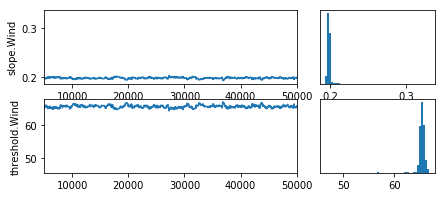



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


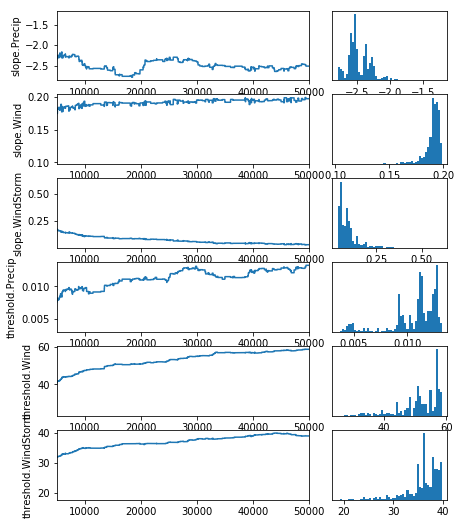

14


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


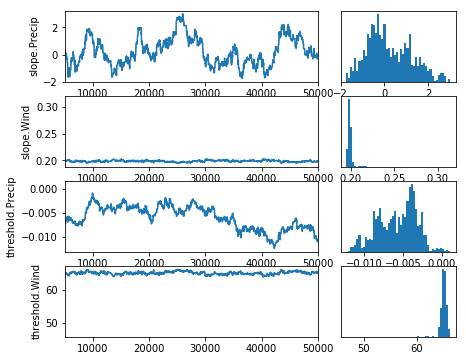



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


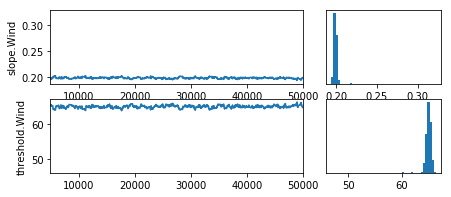



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


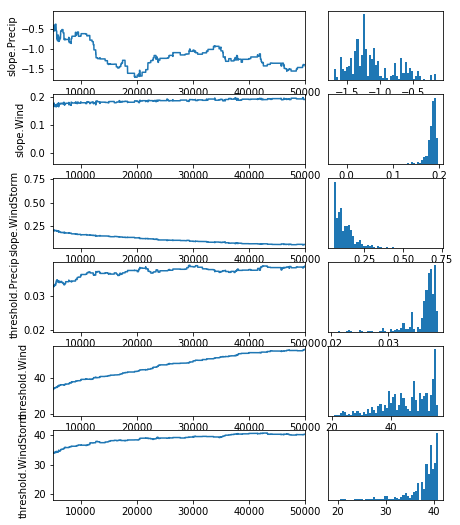

15


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


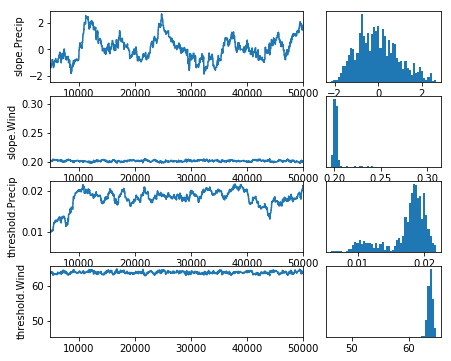



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


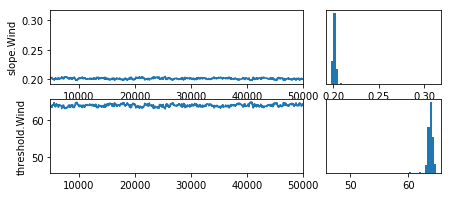



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


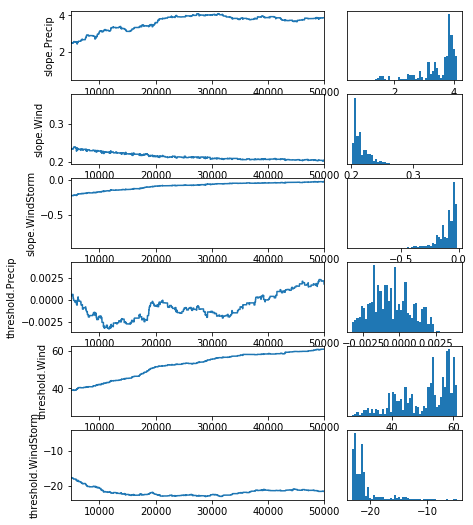

16


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


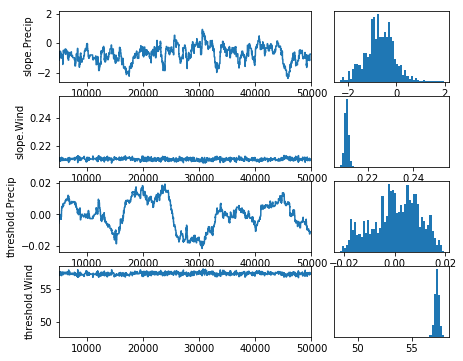



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


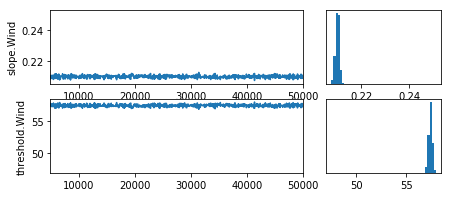



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


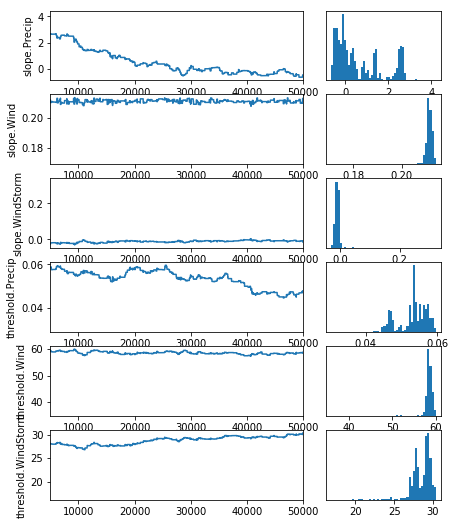

17


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


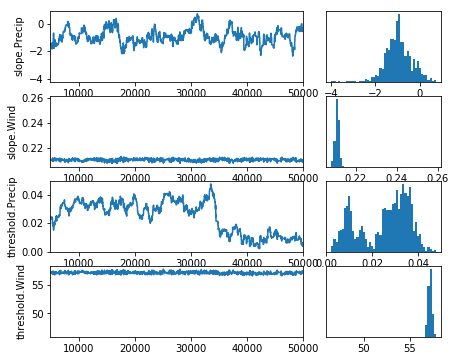



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


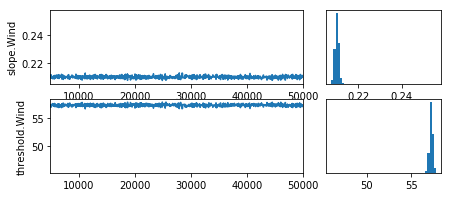



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


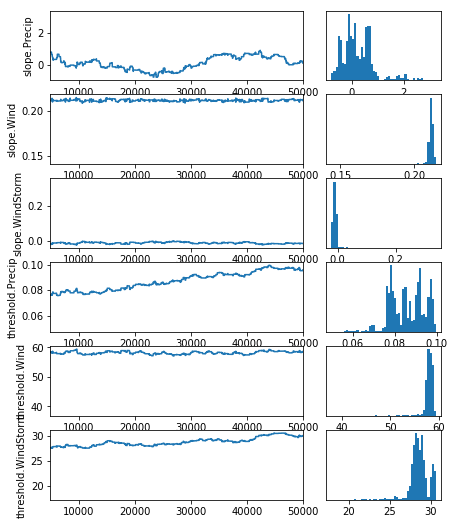

18


Index([u'slope.Precip', u'slope.Wind', u'threshold.Precip', u'threshold.Wind'], dtype='object')


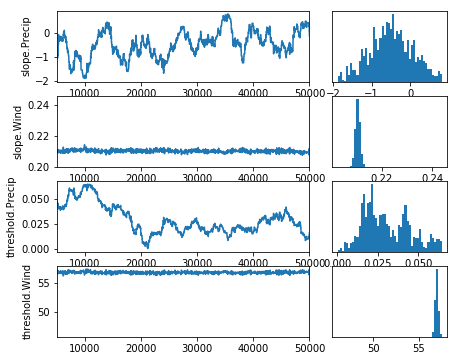



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


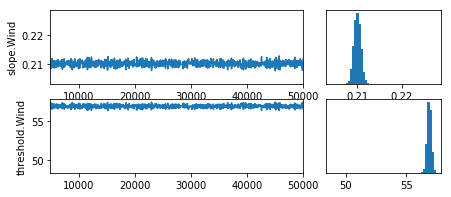



Index([u'slope.Precip', u'slope.Wind', u'slope.WindStorm', u'threshold.Precip',
       u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


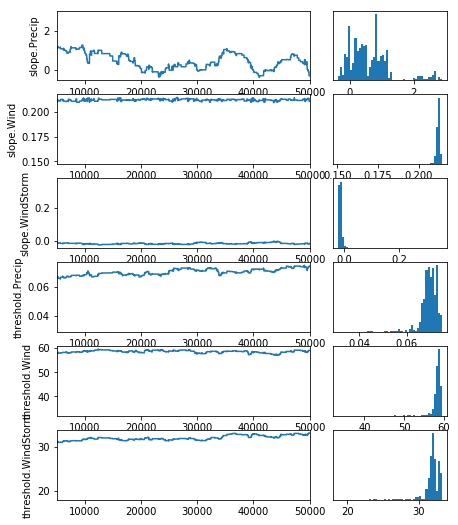

19
20


Index([u'slope.DayPrecip', u'slope.Wind', u'threshold.DayPrecip',
       u'threshold.Wind'],
      dtype='object')


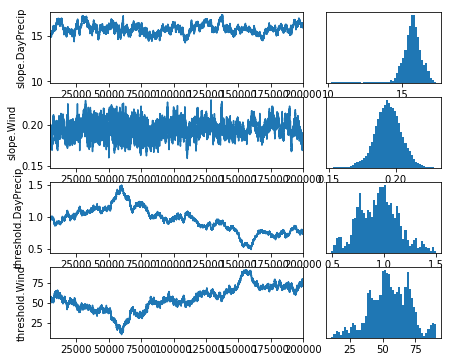



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


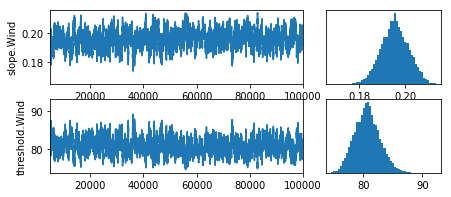



Index([u'slope.DayPrecip', u'slope.Wind', u'slope.WindStorm',
       u'threshold.DayPrecip', u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


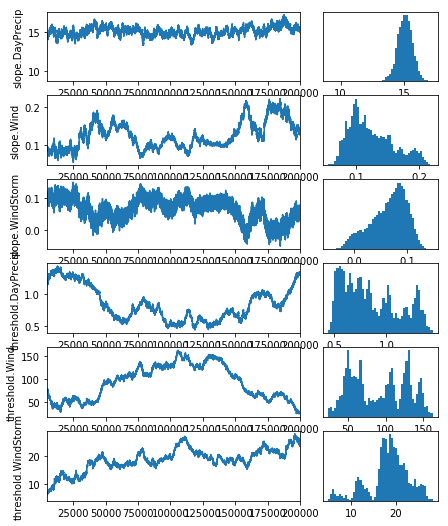

21


Index([u'slope.DayPrecip', u'slope.Wind', u'threshold.DayPrecip',
       u'threshold.Wind'],
      dtype='object')


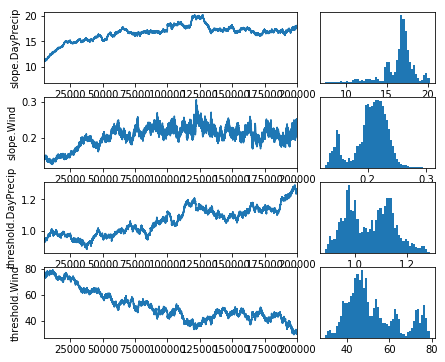



Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


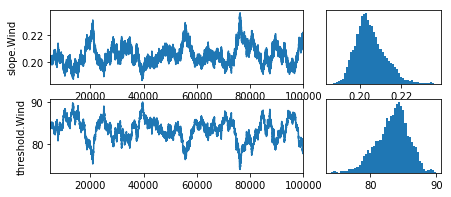



Index([u'slope.DayPrecip', u'slope.Wind', u'slope.WindStorm',
       u'threshold.DayPrecip', u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


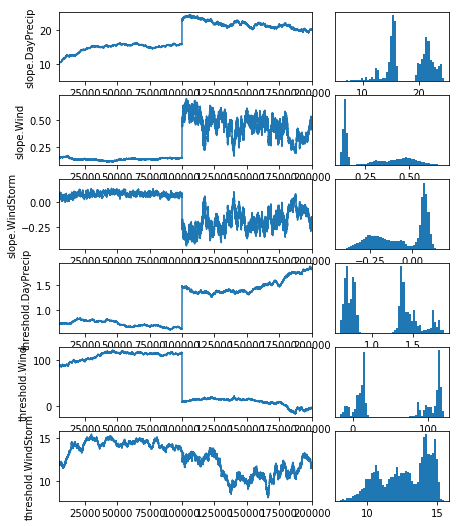

22


Index([u'slope.DayPrecip', u'slope.Wind', u'threshold.DayPrecip',
       u'threshold.Wind'],
      dtype='object')


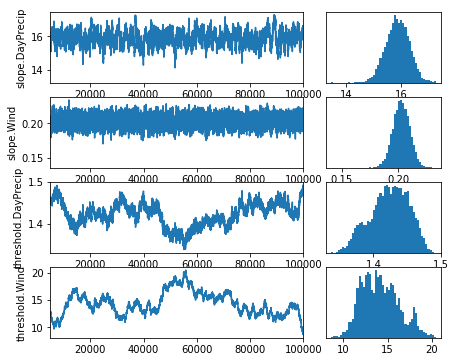



Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


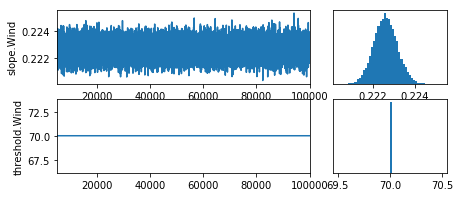



Index([u'slope.DayPrecip', u'slope.Wind', u'slope.WindStorm',
       u'threshold.DayPrecip', u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


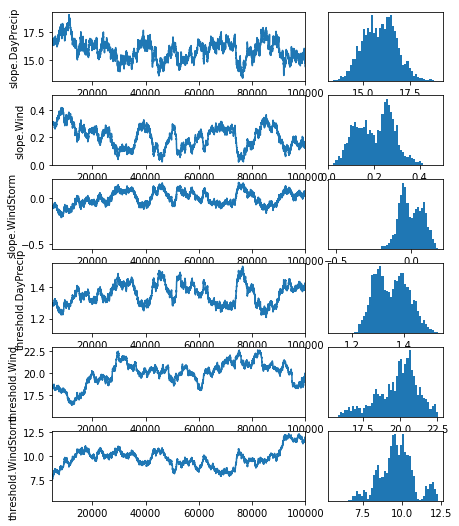

23


Index([u'slope.DayPrecip', u'slope.Wind', u'threshold.DayPrecip',
       u'threshold.Wind'],
      dtype='object')


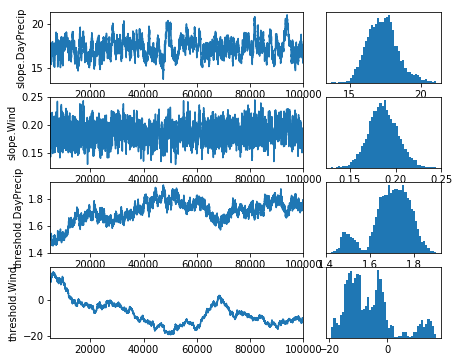



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


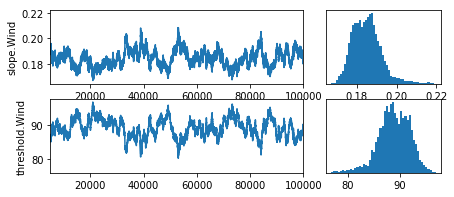



Index([u'slope.DayPrecip', u'slope.Wind', u'slope.WindStorm',
       u'threshold.DayPrecip', u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


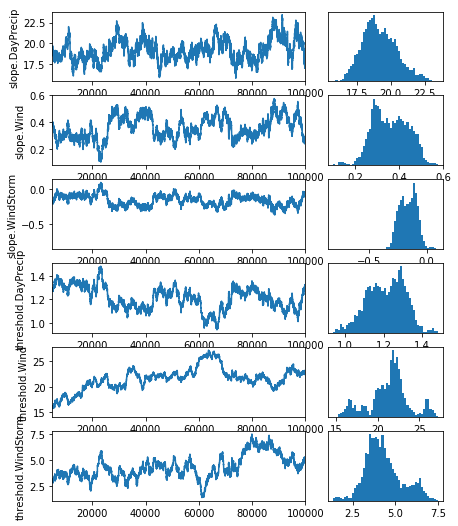

24


Index([u'slope.DayPrecip', u'slope.Wind', u'threshold.DayPrecip',
       u'threshold.Wind'],
      dtype='object')


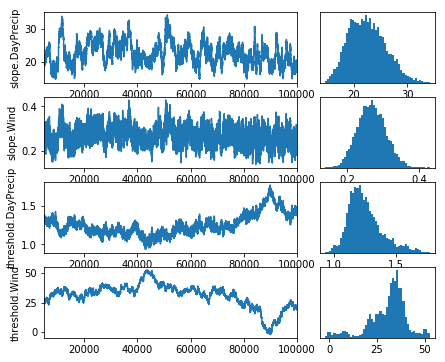



Index([u'slope.Wind', u'threshold.Wind'], dtype='object')


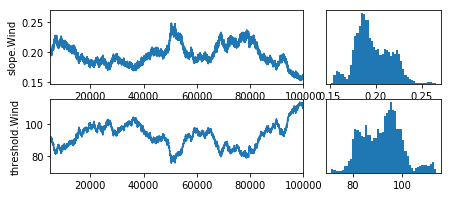



Index([u'slope.DayPrecip', u'slope.Wind', u'slope.WindStorm',
       u'threshold.DayPrecip', u'threshold.Wind', u'threshold.WindStorm'],
      dtype='object')


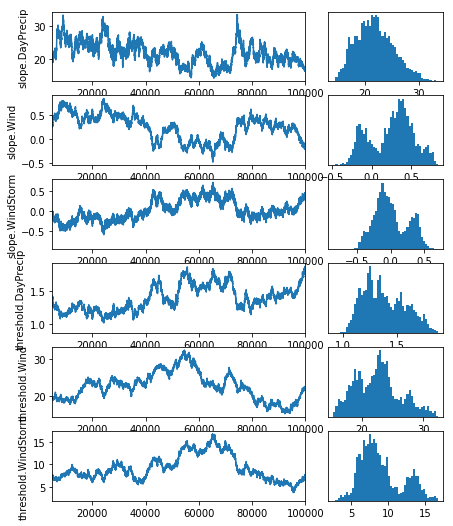

25
26
27


In [104]:

def make_plot(scenario, chain_name):
    params = pd.read_csv(os.path.join('scenarios', scenario, 'chains', chain_name), index_col=0)
    params = params[params.keys()[:-1]]
    
    print '\n\n', params.keys()

    n_params = len(params.keys())
    fig = plt.figure(figsize=(7,1.5*n_params))
    for i, p in enumerate(params.keys()):
        ax = plt.subplot2grid((n_params, 3), (i, 0), colspan=2)
        ax.plot(params[p].tolist())

        ax.set_ylabel(p)
#         ax.set_xticks([])

        ax.set_xlim(5e3, len(params))
        
        ax = plt.subplot2grid((n_params, 3), (i, 2), colspan=1)
        ax.hist(params[p].tolist(), bins=50)
        
        ax.set_yticks([])
    plt.show()


def make_plot2(scenario, chain_name):
    params = pd.read_csv(os.path.join('scenarios', scenario, 'chains', chain_name), index_col=0)
    fig = plt.figure(figsize=(7,3))
    for i, p in enumerate(['slope.Wind','threshold.Wind']):
        ax = plt.subplot2grid((2, 3), (i, 0), colspan=2)
        ax.plot(params[p].tolist())

        ax.set_ylabel(p)
#         ax.set_xticks([])

        ax.set_xlim(1e3,5e4)
        
        ax = plt.subplot2grid((2, 3), (i, 2), colspan=1)
        ax.hist(params[p].tolist(), bins=50)
        
        ax.set_yticks([])
    plt.show()

for i in range(1,28):# scenario = 'scenario13'
    print i
    scenario = 'scenario%i'%(i)
    if not os.path.exists(os.path.join('scenarios', scenario, 'chains')):
        continue
    for model in os.listdir(os.path.join('scenarios', scenario, 'chains')):
        if 'metadata' in model:
            pass
        else:
            make_plot(scenario, model)
                     
                     
                     

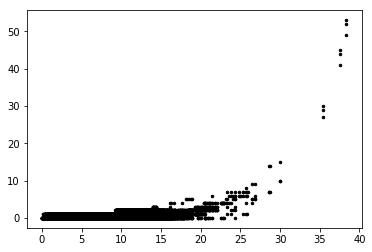

In [42]:
i = 2
failures = pd.read_csv(os.path.join('scenarios','scenario%i'%(i),'failures.csv'), index_col='time')
X = pd.read_csv(os.path.join('inputs/weather.csv'), index_col='time')

fig, ax = plt.subplots()
ax.plot(X['Wind'], failures['count'], ls=' ', marker='.', markersize=5, color='k', label=r'$Y$')
plt.show()